# Importing Data
<hr>

<h3>Setting Up..</h3>

In [1]:
library(datasets)
library(randomForest)
library(tidyverse)
library(reshape2)
require(caTools)
require(gridExtra)

if(!require(pacman)) install.packages("pacman")
pacman::p_load(pacman, rio)
pacman::p_load(mice)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine()  masks randomForest::combine()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ ggplot2::margin() masks randomForest::margin()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Loading required package: caTools

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:randomForest’:

    combine


Loading required package: pacman



<h3>Importing DataFrame from CSV File</h3>
The 'rio' package is a useful library for importing datasets from external files

In [2]:
list.files(path = "../input")
data_csv <- import("../input/pima-indians-diabetes-database/diabetes.csv")
head(data_csv)

[1] "pima-indians-diabetes-database"

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0



# Data Exploration
<hr>
<h3>Variable Identification</h3>
As we can see from the imported dataset, the **predictor values** include:

In [3]:
print(colnames(data_csv[,-9]))

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     


And our **target value** will be:

In [4]:
print(colnames(data_csv[9]))

[1] "Outcome"


Setting our Target Value as a factor with 2 levels - 0 and 1

In [5]:
data_csv$Outcome <- as.logical(data_csv$Outcome)
str(data_csv)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : logi  TRUE FALSE TRUE FALSE TRUE FALSE ...


<hr>
<h3>Handling Missing Data</h3>
All the '0's are replaced with 'NA' except for - Pregnancies and Outcome, since having 0 pregnancies is a possible event.

In [6]:
for (x in colnames(data_csv)[2:(length(colnames(data_csv))-1)]) # replace 0 with NA for all columns except Pregnancies and Outcome
{
    data_csv[x][data_csv[x] == 0] <- NA
}

for (x in colnames(data_csv)[1:length(colnames(data_csv))]) # display number of missing values for each column 
{
    print(sum(is.na(data_csv[x])))
}
head(data_csv)

[1] 0
[1] 5
[1] 35
[1] 227
[1] 374
[1] 11
[1] 0
[1] 0
[1] 0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<lgl>
1,6,148,72,35,NA,33.6,0.627,50,TRUE
2,1,85,66,29,NA,26.6,0.351,31,FALSE
3,8,183,64,NA,NA,23.3,0.672,32,TRUE
4,1,89,66,23,94,28.1,0.167,21,FALSE
5,0,137,40,35,168,43.1,2.288,33,TRUE
6,5,116,74,NA,NA,25.6,0.201,30,FALSE


,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose,BMI,BloodPressure,SkinThickness,Insulin,
392,1,1,1,1,1,1,1,1,1,0
140,1,1,1,1,1,1,1,1,0,1
192,1,1,1,1,1,1,1,0,0,2
2,1,1,1,1,1,1,0,1,0,2
26,1,1,1,1,1,1,0,0,0,3
1,1,1,1,1,1,0,1,1,1,1
1,1,1,1,1,1,0,1,1,0,2
2,1,1,1,1,1,0,1,0,0,3
7,1,1,1,1,1,0,0,0,0,4
1,1,1,1,1,0,1,1,1,1,1


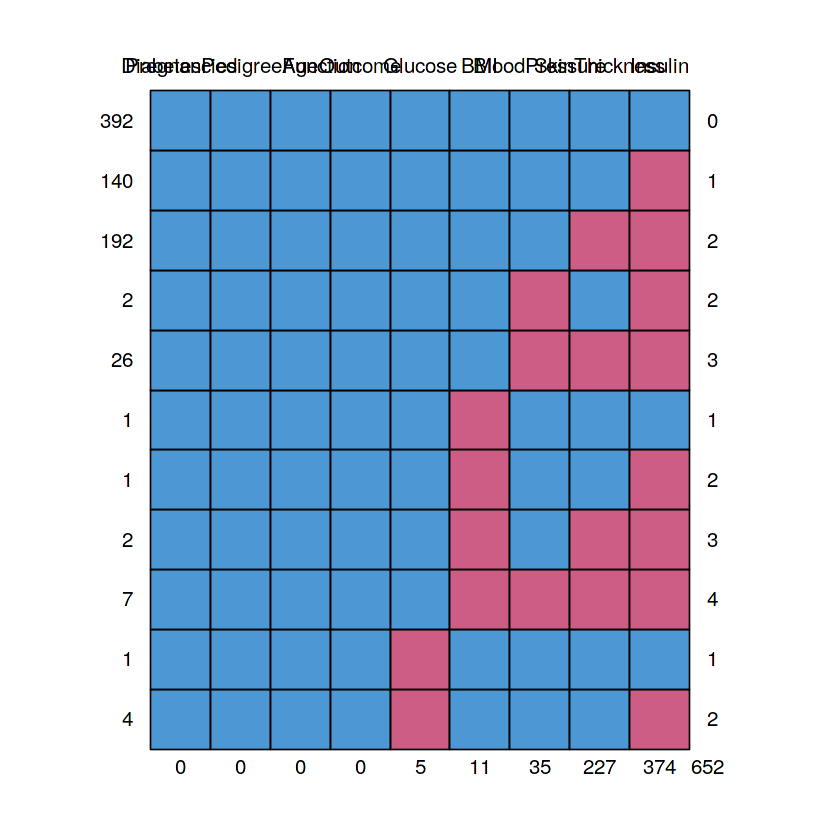

In [7]:
md.pattern(data_csv) # MICE reads and presents a summary plot for missing data

In [8]:
imputed_data <- mice(data_csv, m=5, method='pmm', seed=101) 
summary(imputed_data)


 iter imp variable
  1   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   2  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   3  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   4  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  1   5  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   2  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   3  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   4  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  2   5  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   2  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   3  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   4  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  3   5  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  4   1  Glucose  BloodPressure  SkinThickness  Insulin  BMI
  4 

In [9]:
imputed_data <- complete(imputed_data, 3)
head(imputed_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<lgl>
1,6,148,72,35,105,33.6,0.627,50,TRUE
2,1,85,66,29,115,26.6,0.351,31,FALSE
3,8,183,64,10,225,23.3,0.672,32,TRUE
4,1,89,66,23,94,28.1,0.167,21,FALSE
5,0,137,40,35,168,43.1,2.288,33,TRUE
6,5,116,74,20,87,25.6,0.201,30,FALSE


<hr>
<h3>Univariate Analysis</h3>

* **Outcome** - this variable represents the outcome of the survey as the patient being Diabetic or Not (True/False)

In [10]:
# Creating a general theme to be applied for all the plots
my_theme <- theme(plot.title = element_text(size=20, hjust=0.5),
          panel.grid.minor = element_line(size=0),
          panel.grid.major = element_line(size=0),
          axis.title.y = element_text(size=16),
          axis.title.x = element_text(size=16),
          axis.text.y = element_text(size=14),
          axis.text.x = element_text(size=14),
          legend.title = element_text(size=16),
          legend.text = element_text(size=14))

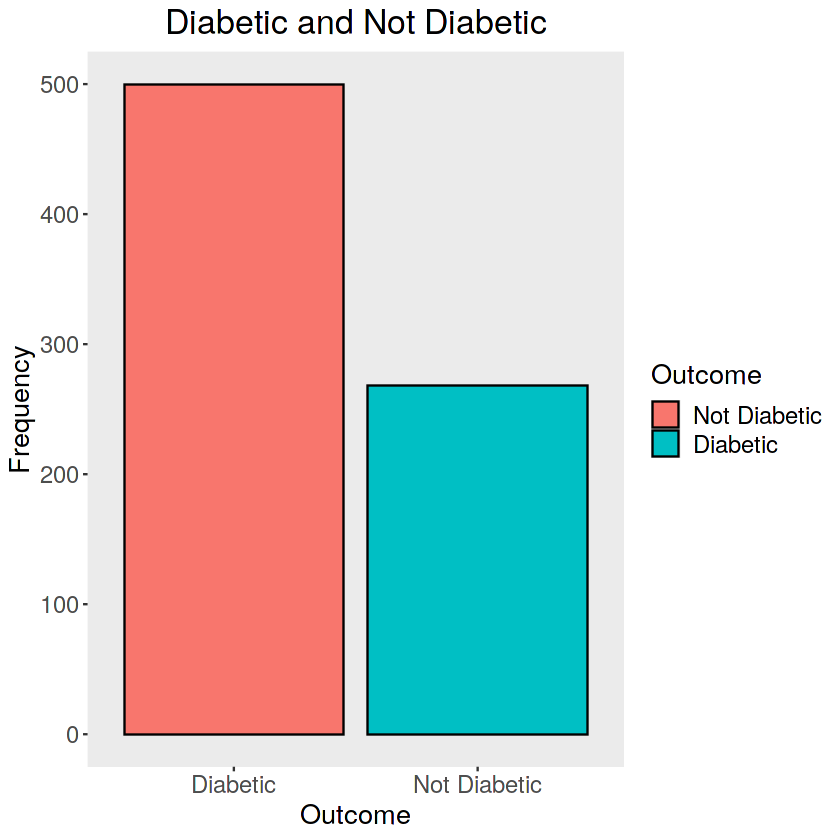

In [11]:
# A Bar Plot to depict the no. of diabetic and non-diabetic outcomes
plot1 <- ggplot(imputed_data, aes(x = Outcome, fill=Outcome)) + 
    geom_bar(position="dodge", colour="black") +
    ggtitle("Diabetic and Not Diabetic") +
    xlab("Outcome") +
    ylab("Frequency") +
    labs(fill="Outcome") +
    scale_x_discrete(labels=c("Diabetic", "Not Diabetic")) +
    scale_fill_discrete(labels=c("Not Diabetic", "Diabetic")) +
    my_theme
plot1

* The no. of patients that do not seem to have diabetes is almost double the no. of patients that do. 
* We set the Outcome variable (logical) as a factor with two levels - False(2) and True(1) for further analysis

In [12]:
imputed_data$Outcome <- as.factor(imputed_data$Outcome)
str(imputed_data)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 88 70 96 ...
 $ SkinThickness           : int  35 29 10 23 35 20 32 26 45 46 ...
 $ Insulin                 : int  105 115 225 94 168 87 88 165 543 194 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 42.3 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : Factor w/ 2 levels "FALSE","TRUE": 2 1 2 1 2 1 2 1 2 2 ...


<hr>
Making a generalised function for plotting all predictor variables and their distributions

In [13]:
plot_var <- function(plot_input, str_x) {
    
    plotHist <- ggplot(imputed_data, aes(x=plot_input)) +
        geom_bar(position="dodge", fill="#09E183") +
        xlab(str_x) +
        my_theme

    plotBox <- ggplot(imputed_data, aes(x=Outcome, y=plot_input)) +
        geom_boxplot(position="dodge", color="black", fill="#E65151") +
        ylab(str_x) +
        my_theme
    
    grid.arrange(plotHist, plotBox, ncol=2)
}

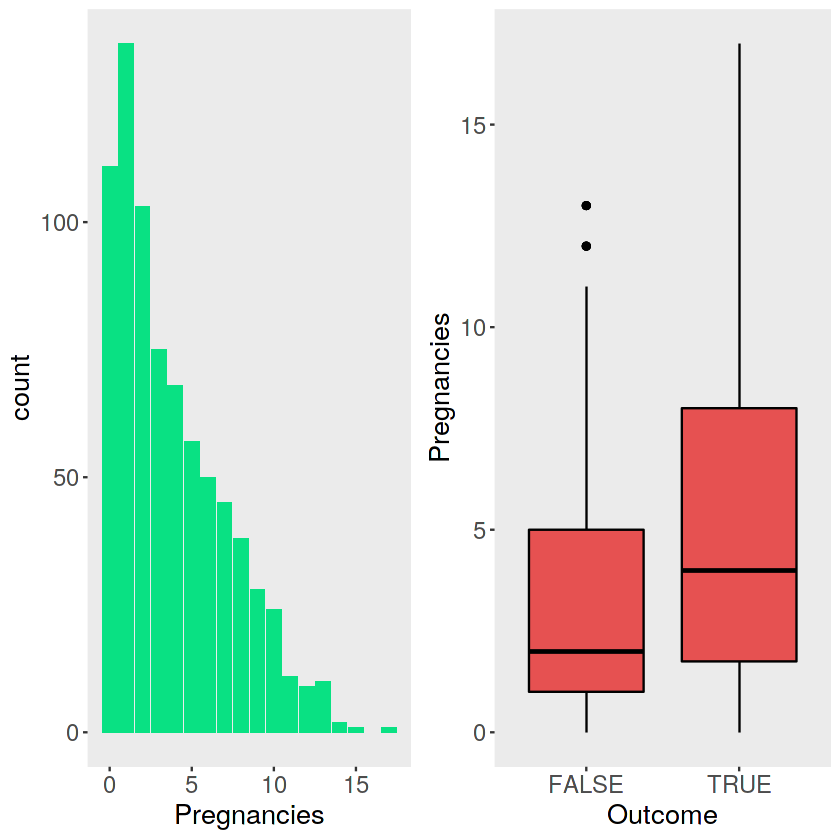

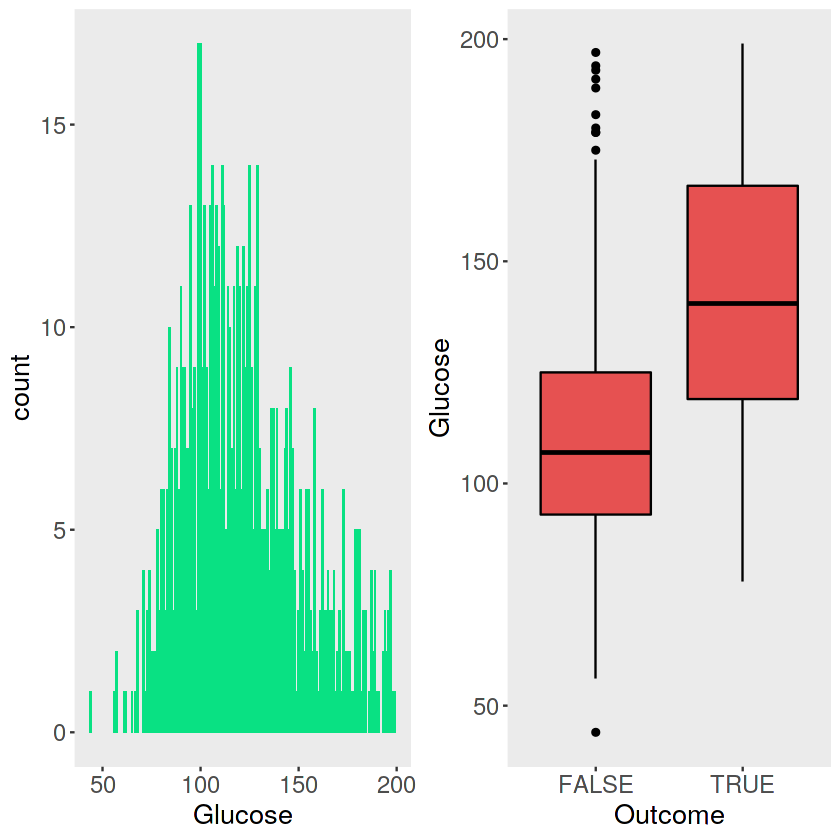

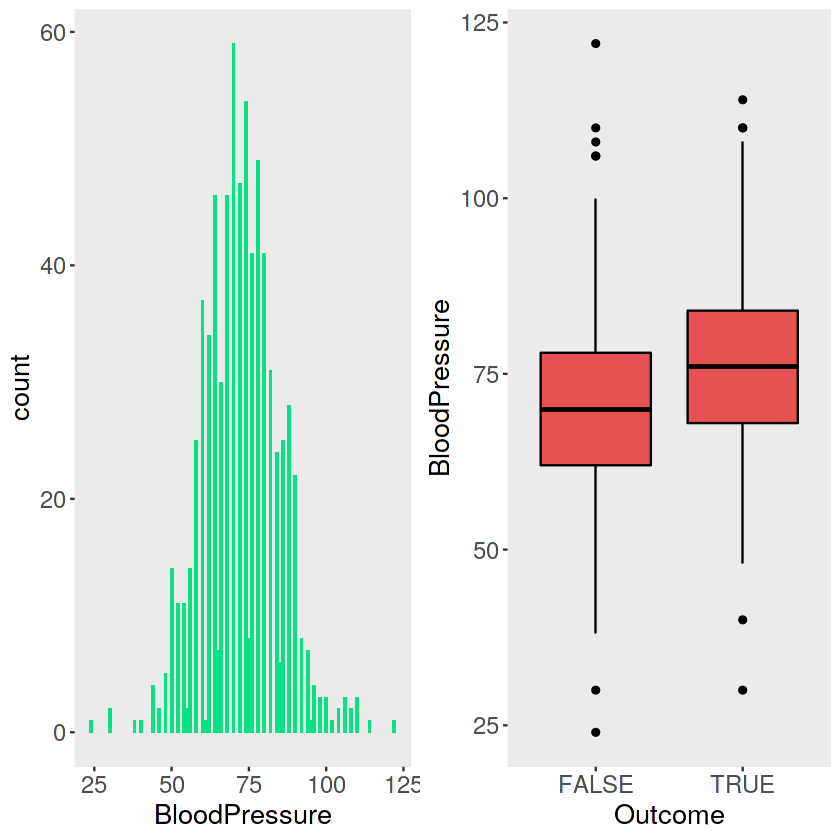

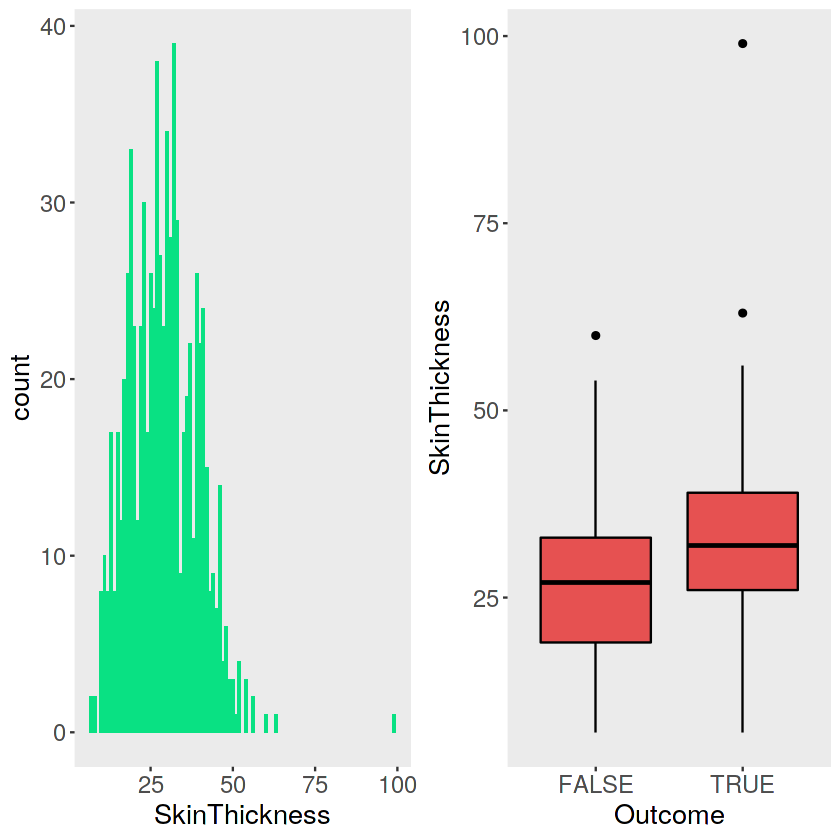

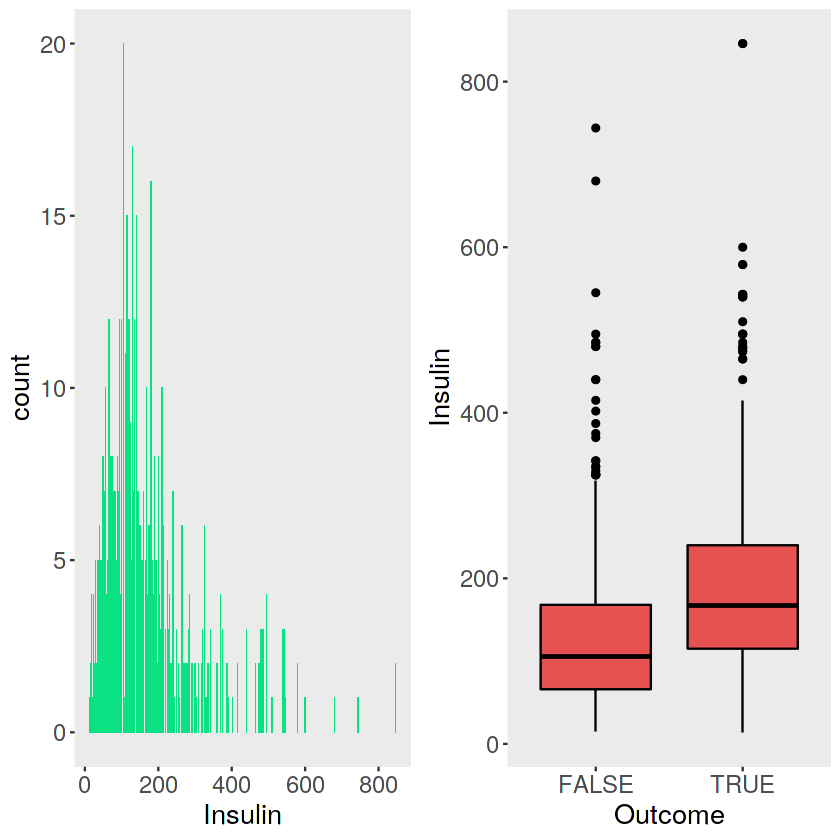

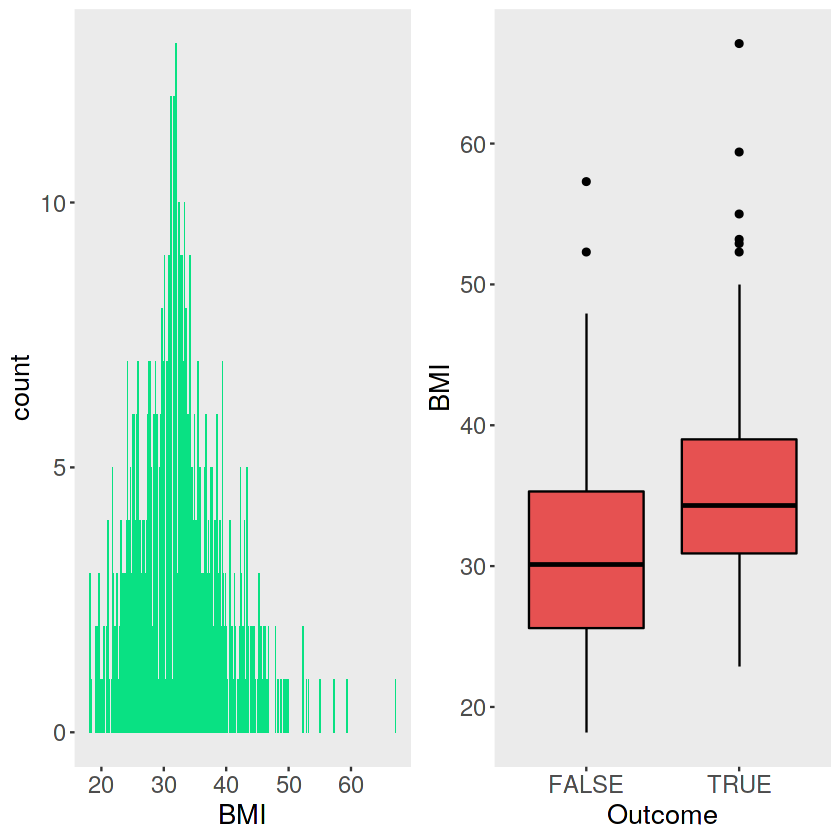

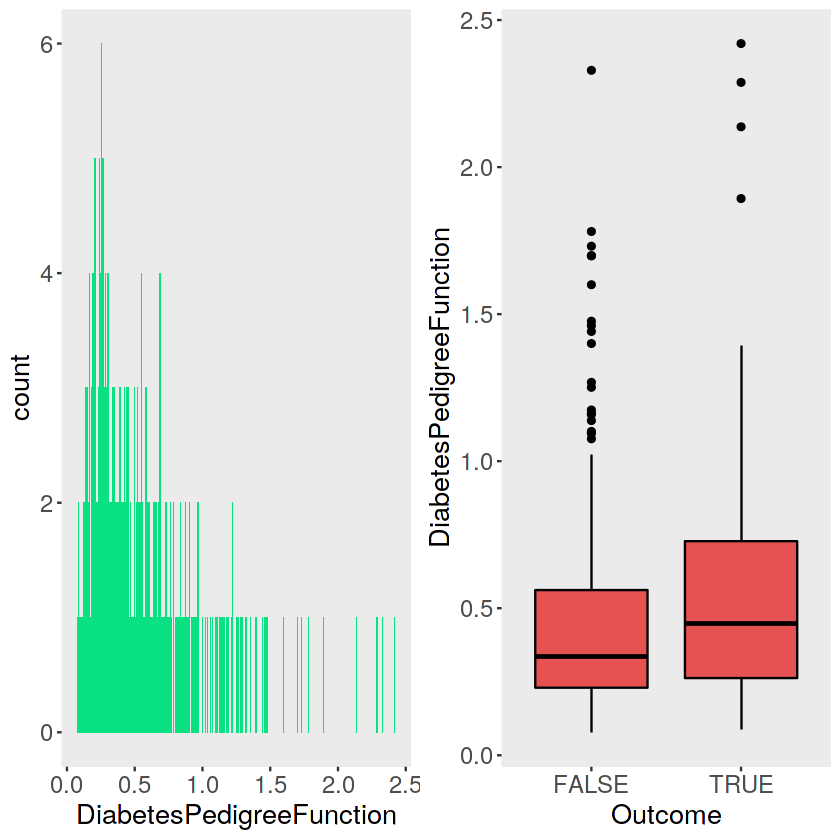

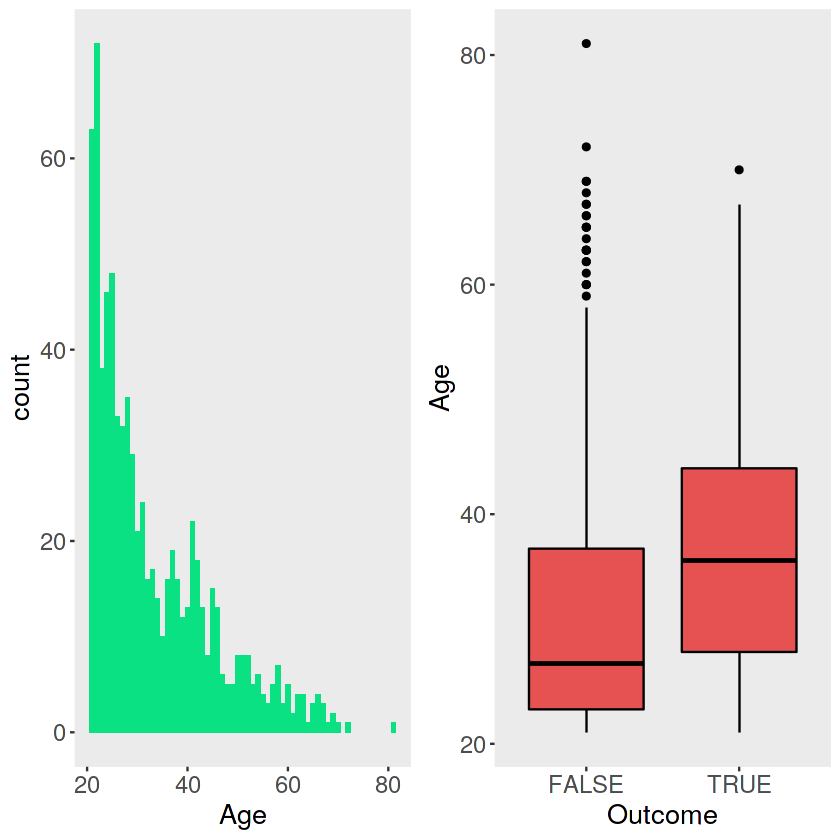

In [14]:
for (x in colnames(imputed_data)[1:(length(colnames(imputed_data))-1)])
{
    plot_var(imputed_data[[x]], x)
}

<hr>
<h3>Preparing Data for Processing</h3>

Normalizing and Scaling the data for better results.

In [15]:
normalize <- function(x) {
    return ((x-min(x))/(max(x)-min(x)))
}

imp_norm = subset(imputed_data, select = -Outcome)
imp_norm = as.data.frame(lapply(imp_norm, normalize))

imp_norm$Outcome = imputed_data$Outcome
head(imp_norm)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.35294118,0.6709677,0.4897959,0.3043478,0.10937500,0.3149284,0.23441503,0.4833333,TRUE
2,0.05882353,0.2645161,0.4285714,0.2391304,0.12139423,0.1717791,0.11656704,0.1666667,FALSE
3,0.47058824,0.8967742,0.4081633,0.0326087,0.25360577,0.1042945,0.25362938,0.1833333,TRUE
4,0.05882353,0.2903226,0.4285714,0.1739130,0.09615385,0.2024540,0.03800171,0.0000000,FALSE
5,0.00000000,0.6000000,0.1632653,0.3043478,0.18509615,0.5092025,0.94363792,0.2000000,TRUE
6,0.29411765,0.4645161,0.5102041,0.1413043,0.08774038,0.1513292,0.05251921,0.1500000,FALSE


The Outcome is labelled by factors and the dataset is split into two (75-25) for training and validation

In [16]:
smp_size <- floor(0.75 * nrow(imp_norm))
set.seed(101)
t_index <- sample(seq_len(nrow(imp_norm)), size = smp_size)

train <- imp_norm[t_index, ]
test <- imp_norm[-t_index, ]

head(train)
head(test)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
430,0.05882353,0.3290323,0.5918367,0.1956522,0.199519231,0.3435583,0.06618275,0.36666667,TRUE
95,0.11764706,0.6322581,0.5918367,0.1195652,0.060096154,0.1329243,0.29163108,0.00000000,FALSE
209,0.05882353,0.3354839,0.4081633,0.2173913,0.087740385,0.3067485,0.09009394,0.00000000,FALSE
442,0.11764706,0.2516129,0.4285714,0.1739130,0.043269231,0.2862986,0.17890692,0.01666667,FALSE
351,0.23529412,0.3096774,0.5714286,0.3804348,0.004807692,0.4907975,0.06789069,0.13333333,FALSE
315,0.41176471,0.4193548,0.5714286,0.2608696,0.050480769,0.3619632,0.44790777,0.36666667,TRUE


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
8,0.5882353,0.4580645,0.6530612,0.20652174,0.18149038,0.34969325,0.02391119,0.13333333,FALSE
27,0.4117647,0.6645161,0.5306122,0.48913043,0.39423077,0.43353783,0.07643040,0.36666667,TRUE
29,0.7647059,0.6516129,0.5918367,0.13043478,0.11538462,0.08179959,0.07130658,0.60000000,FALSE
30,0.2941176,0.4709677,0.6938776,0.21739130,0.11538462,0.32515337,0.11058924,0.28333333,FALSE
32,0.1764706,0.7354839,0.5306122,0.31521739,0.27764423,0.27402863,0.33005978,0.11666667,TRUE
33,0.1764706,0.2838710,0.3469388,0.04347826,0.04807692,0.13496933,0.08070026,0.01666667,FALSE


<hr>
# Data Processing
<h3>Applying the Random Forest Algorithm</h3>

In [17]:
rf_imp <- randomForest(Outcome~., data=train, ntree=500)
print(rf_imp)


Call:
 randomForest(formula = Outcome ~ ., data = train, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 23.78%
Confusion matrix:
      FALSE TRUE class.error
FALSE   315   57   0.1532258
TRUE     80  124   0.3921569


In [18]:
y_pred <- predict(rf_imp, newdata = test)
cm = table(test$Outcome, y_pred)
cm

       y_pred
        FALSE TRUE
  FALSE   111   17
  TRUE     27   37

In [19]:
# Error rate:
print((cm[1,2] + cm[2,1]) / (cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2])*100)

[1] 22.91667
